In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics
from sklearn.model_selection import train_test_split

## Generating Random data

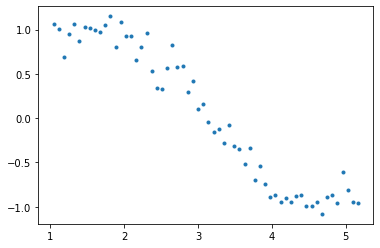

In [3]:
np.random.seed(10)

x=np.array([i*np.pi/180 for i in range(60,300,4)])

y=np.sin(x) + np.random.normal(0,0.15,len(x))

curve = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

plt.plot(curve['x'],curve['y'],'.')

### polynomial regression

In [11]:
def fit_poly(degree):
    
    p = np.polyfit( curve.x, curve.y, deg = degree ) #fit a polynomial p(x) = p[0] * x**deg + ..... + p[deg] of degree deg to points(x,y)
    
    curve['fit'] = np.polyval( p, curve.x )
    
    sn.regplot( curve.x, curve.y,  fit_reg = False )
    
    return plt.plot( curve.x, curve.fit, label='fit' )

In [12]:
train_x, test_x, train_y, test_y = train_test_split( curve.x,
                                                   curve.y,
                                                   test_size = 0.40,
                                                   random_state = 100)

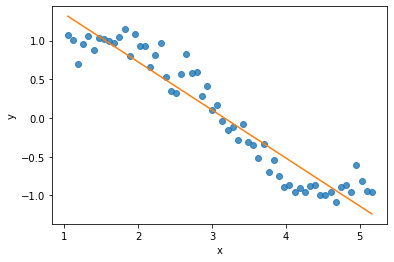

In [13]:
fit_poly(1)

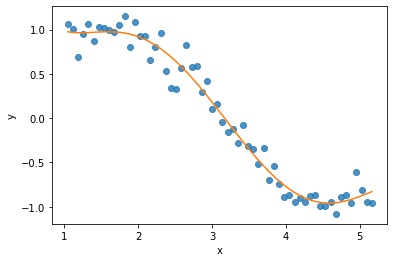

In [14]:
fit_poly(5)

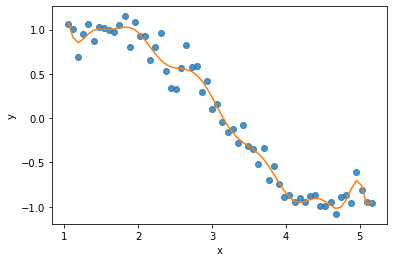

In [15]:
fit_poly(15)

In [16]:
def get_rmse( y, y_fit ):
    return np.sqrt( metrics.mean_squared_error(y, y_fit) )

In [19]:
rmse_df = pd.DataFrame( columns = ["degree", "rmse_train", "rmse_test"] )

for i in range ( 1,15 ): #iterating through all the degree from 1 to 15
    p = np.polyfit( train_x, train_y, deg = i )
    rmse_df.loc[i-1] = [i, get_rmse( train_y, np.polyval(p, train_x) ),
                       get_rmse( test_y, np.polyval(p, test_x))]

In [20]:
rmse_df

,degree,rmse_train,rmse_test
0,1.0,0.231569,0.237707
1,2.0,0.229154,0.244414
2,3.0,0.115409,0.165920
3,4.0,0.113938,0.164451
4,5.0,0.110525,0.159416
5,6.0,0.105360,0.166479
6,7.0,0.104923,0.161330
7,8.0,0.104414,0.157364
8,9.0,0.100549,0.160113
9,10.0,0.100393,0.158239


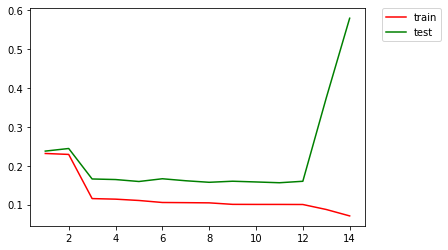

In [23]:
plt.plot( rmse_df.degree,
        rmse_df.rmse_train,
        label='train',
        color = 'r')

plt.plot( rmse_df.degree,
        rmse_df.rmse_test,
        label='test',
        color = 'g' )

plt.legend(bbox_to_anchor=(1.05,1),
          loc=2,
          borderaxespad=0)